In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
import seaborn as sns
import statannot
import scipy.stats as stats
import itertools
from statannot import add_stat_annotation
import scipy.stats

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

import warnings
from matplotlib.colors import ListedColormap

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings("ignore")

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay

In [6]:
VolFdLac = pd.read_csv('/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/fractal_lac_data.csv')
tumorType = ['GBM' if hist == 'glioblastoma' else 'LGG' for hist in VolFdLac['Histology'] ]

VolFdLac['type'] =  tumorType

dff = pd.read_excel('/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/TCGA_LGG_GBM_radiomicFeatures_clinicalDetails.xlsx',"Sheet1" )
dff =  dff[['ID','MGMT_promoter_status', 'IDH_status']]

glioma =  VolFdLac.merge(dff, left_on='ID', right_on='ID')

glioma['MGMT_promoter_status'] = glioma['MGMT_promoter_status'].str[0:-6]
glioma['IDH_status'] = glioma['IDH_status'].str[0:3]
glioma.shape

(159, 26)

## Initial Analysis

In [7]:
df1 = glioma.dropna(subset = 'IDH_status')
df2 = df1.dropna(subset='MGMT_promoter_status')

print(len(df1), len(df2))

142 119


In [8]:
print(df1['IDH_status'].value_counts(dropna=False))
print(df2['MGMT_promoter_status'].value_counts(dropna=False))

IDH_status
WT     87
Mut    55
Name: count, dtype: int64
MGMT_promoter_status
Meth      74
Unmeth    45
Name: count, dtype: int64


## Paths for saving files

In [9]:
#for scatter plot
scp_path = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/Scatter Plots/'

#for decision Boundary FD abd Lac
db_path_fd = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/ML Models/FD/'
db_path_lac = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/ML Models/Lac/'

#For ROC Curves
roc_path = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/Final_ROC_Curves/'

## Scatter Plots

In [23]:
print(len(df1))
df1.sort_values(by='ncr_net_meanfd')[['MGMT_promoter_status', 'IDH_status', 'ncr_net_meanfd']]

142


,MGMT_promoter_status,IDH_status,ncr_net_meanfd
87,Unmeth,WT,0.096188
41,NaN,WT,0.202553
109,Unmeth,WT,0.205425
106,Meth,Mut,0.314880
46,NaN,WT,0.434071
...,...,...,...
128,Meth,Mut,1.825412
150,Meth,Mut,1.846762
52,Meth,Mut,1.875870
151,Meth,Mut,1.876269


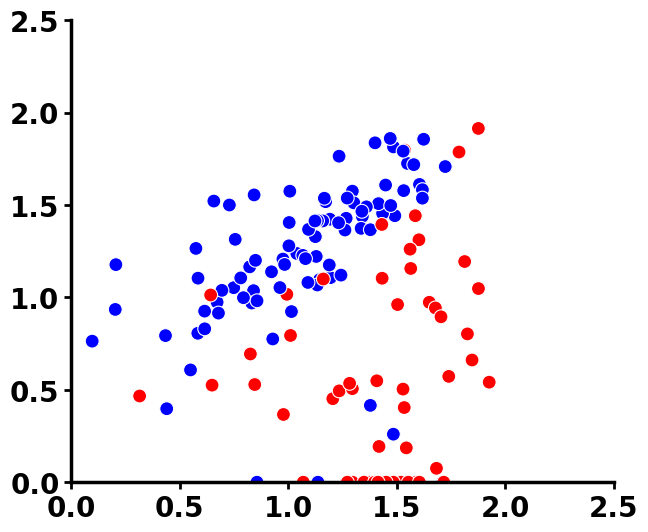

In [26]:
#FD IDH Scatter/ Red - Mutant, Blue - WT
fig, ax = plt.subplots(figsize=(7, 6))

sns.scatterplot(x = 'ncr_net_meanfd', y = 'et_meanfd', hue= 'IDH_status', palette=["#0000FF", "#FF0000"],
                data = df1,legend= False, s=100)


ax.set_xlabel('',fontsize = 20,weight = "bold")
ax.set_ylabel('',fontsize = 20,weight = "bold")

plt.rcParams["font.weight"] = "bold"
plt.rc('xtick',labelsize=20) 
plt.rc('ytick', labelsize=20) 

ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

ax.xaxis.set_tick_params(width=2, length=5, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=5, labelsize = 20)

plt.xlim(0, 2.5)
plt.ylim(0, 2.5)

#fig.savefig(scp_path + 'IDH_Lac_scatter.tiff', dpi = 600)

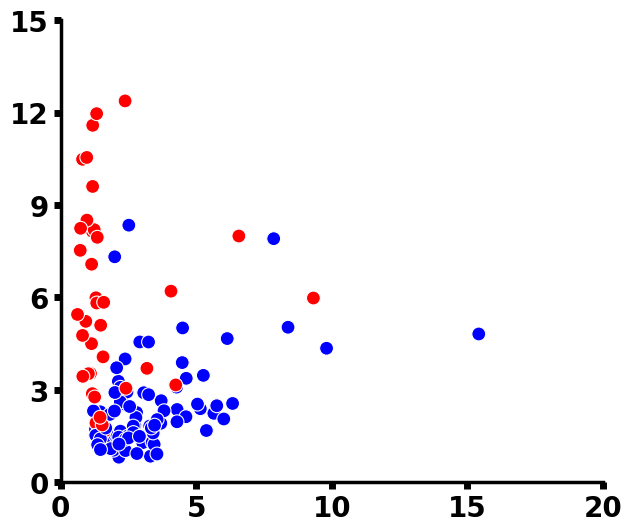

In [27]:
#Lac IDH Scatter
fig, ax = plt.subplots(figsize=(7, 6))

sns.scatterplot(x = 'ncr_net_meanlac', y = 'et_meanlac', hue= 'IDH_status', palette=["#0000FF", "#FF0000"],
                data = df1,legend= False, s=100)


ax.set_xlabel('',fontsize = 20,weight = "bold")
ax.set_ylabel('',fontsize = 20,weight = "bold")


plt.rcParams["font.weight"] = "bold"
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 


ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

ax.xaxis.set_tick_params(width=5, length=5, labelsize =20)
ax.yaxis.set_tick_params(width=5, length=5, labelsize =20)

y_ticks = [0, 3, 6, 9, 12, 15]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20)

plt.xlim(0, 20)
plt.ylim(0, 15)

#fig.savefig(scp_path + 'IDH_Lac_scatter.tiff', dpi = 600)

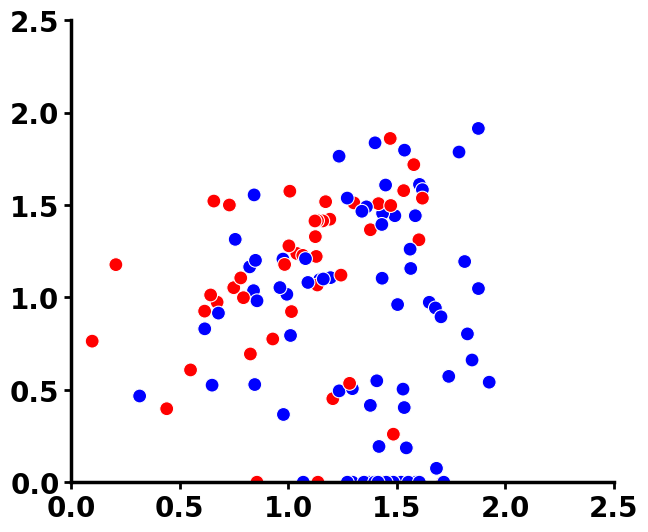

In [28]:
# FD MGMT, Red - Unmethylated. Blue - methylated
fig, ax = plt.subplots(figsize=(7, 6))

sns.scatterplot(x = 'ncr_net_meanfd',y ='et_meanfd',  hue= 'MGMT_promoter_status',
                palette=["#FF0000", "#0000FF"], data = df2,legend=False, s=100)


ax.set_xlabel('',fontsize = 20,weight = "bold")
ax.set_ylabel('',fontsize = 20,weight = "bold")

plt.rcParams["font.weight"] = "bold"
plt.rc('xtick',labelsize=20) 
plt.rc('ytick', labelsize=20) 

ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

ax.xaxis.set_tick_params(width=2, length=5, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=5, labelsize = 20)

plt.xlim(0, 2.5)
plt.ylim(0, 2.5)

#fig.savefig(scp_path + 'MGMT_fd_scatter.tiff', dpi = 600)

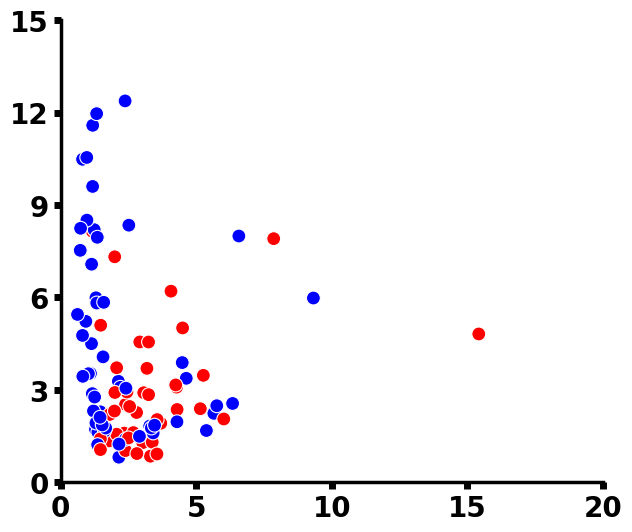

In [29]:
# Lac MGMT
fig, ax = plt.subplots(figsize=(7, 6))

sns.scatterplot(x = 'ncr_net_meanlac', y = 'et_meanlac',  hue= 'MGMT_promoter_status',
                palette=["#FF0000", "#0000FF"], data = df2,legend=False, s=100)


ax.set_xlabel('',fontsize = 20,weight = "bold")
ax.set_ylabel('',fontsize = 20,weight = "bold")

plt.rcParams["font.weight"] = "bold"
plt.rc('xtick',labelsize=20) 
plt.rc('ytick', labelsize=20) 


ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

ax.xaxis.set_tick_params(width=5, length=5, labelsize =20)
ax.yaxis.set_tick_params(width=5, length=5, labelsize =20)

y_ticks = [0, 3, 6, 9, 12, 15]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=20)

plt.xlim(0, 20)
plt.ylim(0, 15)

#fig.savefig(scp_path + 'MGMT_Lac_scatter.tiff', dpi = 600)

## Decision Boundary 

### For Fractal Dimension

In [189]:
classifiers = [
    # SVC(random_state=42),
    # KNeighborsClassifier(10),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=12)
]

In [190]:
def decisionBoundary(x, df):    
    if x == 'idh':
        dfx = df.dropna(subset = ['IDH_status'])  
        Y = dfx[['IDH_status']]
        Y['IDH_status'][Y['IDH_status'] == "WT"] = 1
        Y['IDH_status'][Y['IDH_status'] == "Mut"] = 0
        
    if x == 'mgmt':
        dfx = df.dropna(subset=['MGMT_promoter_status', 'IDH_status'])
        Y = dfx[['MGMT_promoter_status']]
        Y['MGMT_promoter_status'][Y['MGMT_promoter_status'] == "Meth"] = 1
        Y['MGMT_promoter_status'][Y['MGMT_promoter_status'] == "Unmeth"] = 0  

    
    X = dfx[['ncr_net_meanfd', 'et_meanfd']]
    X = np.array(X).reshape((-1,2))
    y = np.array(Y).reshape((-1,1)).astype('int') 
    y = label_binarize(y, classes=[0, 1])

    names = ['', '', '']
    
    from matplotlib.colors import ListedColormap

    

    classifier_names = {
        SVC: "svm",
        KNeighborsClassifier: "knn",
        RandomForestClassifier: "rf",
    }
    
    for classifier in classifiers:
        classifier_name = classifier_names.get(classifier.__class__, "Unknown Classifier")
    
    figure = plt.figure(figsize=(8, 4))
    i = 1
    # iterate over datasets
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    print(len(X_train),len( X_test))

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, len(classifiers) + 1, i)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(clf, score,'\n' )
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name, size=20)
  
        i += 1     
        
    plt.tight_layout()
    
    #figure.savefig(db_path_fd + f'{x}_{classifier_name}.tiff', dpi = 600)

In [191]:
#Decision Boundary for Lac
def decisionBoundary2(x, df):
    if x == 'idh':
        dfx = df.dropna(subset = ['IDH_status'])
        dfy = dfx.dropna(subset=['ncr_net_meanlac', 'et_meanlac'])  
        Y = dfy[['IDH_status']]
        Y['IDH_status'][Y['IDH_status'] == "WT"] = 1
        Y['IDH_status'][Y['IDH_status'] == "Mut"] = 0
        
    if x == 'mgmt':
        dfx = df.dropna(subset='MGMT_promoter_status')
        dfy = dfx.dropna(subset=['ncr_net_meanlac', 'et_meanlac'])  
        Y = dfy[['MGMT_promoter_status']]
        Y['MGMT_promoter_status'][Y['MGMT_promoter_status'] == "Meth"] = 1
        Y['MGMT_promoter_status'][Y['MGMT_promoter_status'] == "Unmeth"] = 0  
      
    X = dfy[['ncr_net_meanlac', 'et_meanlac']]
    X = np.array(X).reshape((-1,2))
    y = np.array(Y).reshape((-1,1)).astype('int') 
    y = label_binarize(y, classes=[0, 1])
    
    names = ['','','']
    
    from matplotlib.colors import ListedColormap

    classifier_names = {
        SVC: "svm",
        KNeighborsClassifier: "knn",
        RandomForestClassifier: "rf",
    }
    
    for classifier in classifiers:
        classifier_name = classifier_names.get(classifier.__class__, "Unknown Classifier")

    figure = plt.figure(figsize=(8, 4))
    i = 1
    # iterate over datasets
       
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    print(len(X_train),len( X_test))

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, len(classifiers) + 1, i)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(clf, score,'\n' )
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
       
        ax.set_title(name, size=20)
        i += 1
        

    plt.tight_layout()
    
    #figure.savefig(db_path_lac + f'{x}_{classifier_name}.tiff', dpi = 600)

99 43
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10,
                       random_state=12) 0.8837209302325582 

83 36
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10,
                       random_state=12) 0.5555555555555556 



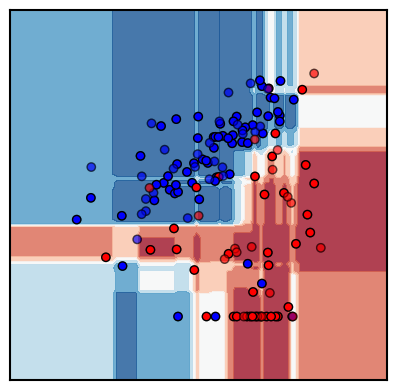

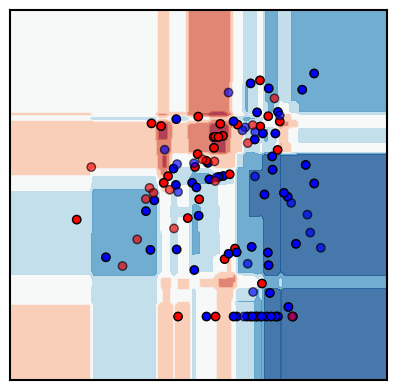

In [192]:
mol_list = ['idh', 'mgmt']
for i in mol_list:
    decisionBoundary(i, df1) #takes value 'idh' or 'mgmt'

### For Lacunarity

85 37
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10,
                       random_state=12) 0.8648648648648649 

69 30
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10,
                       random_state=12) 0.6666666666666666 



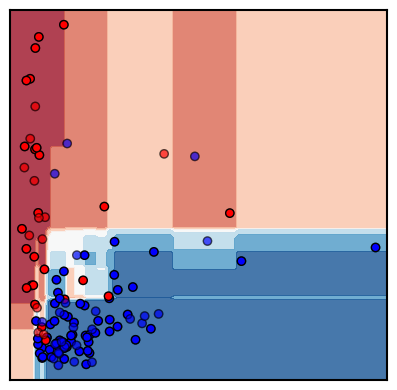

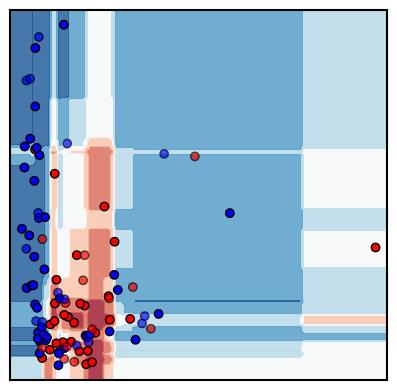

In [193]:
for j in mol_list:
    decisionBoundary2(j, df1) #takes value 'idh' or 'mgmt'

## Test ROC

In [194]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [195]:
# df_test = df.dropna(subset='IDH_status')


# X = df_test[['ncr_net_meanfd', 'et_meanfd']]
# X = np.array(X).reshape((-1,2))


# Y = df_test[['IDH_status']]

# y = Y == 'WT'
# y =  y =  np.array(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

# fig1, ax = plt.subplots(1,1)


# svc = SVC(random_state=42)
# svc.fit(X_train, y_train)
# svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)



# rfc = RandomForestClassifier(n_estimators=10, random_state=42)
# rfc.fit(X_train, y_train)
# rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)


# '''dtc = DecisionTreeClassifier(max_depth=5)
# dtc.fit(X_train, y_train)
# ax = plt.gca()
# dtc_disp = RocCurveDisplay.from_estimator(dtc, X_test, y_test, ax=ax, alpha=0.8, )'''




# knn = KNeighborsClassifier(10)

# knn.fit(X_train, y_train)
# knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax)

# ax.set_xlabel('False Positive Rate',fontsize = 13)
# ax.set_ylabel('True Positive Rate',fontsize = 13)



# ax.tick_params(labelsize=13)

# '''
# ax.set_xlabel(' FALSE POSITIVE RATE', color = 'w',fontsize=18, fontweight='bold')
# ax.set_ylabel(f, fontsize=18, fontweight='bold')'''
# #plt.title('')
# #ax.legend(fontsize=20)
# plt.rc('xtick', labelsize=25) 
# plt.rc('ytick', labelsize=25) 





# ax.spines['right'].set_color('none')
# ax.yaxis.tick_left()

# ax.spines['top'].set_color('none')
# ax.xaxis.tick_bottom()

# ax.spines['bottom'].set_linewidth(2.5)
# ax.spines['left'].set_linewidth(2.5)

# ax.xaxis.set_tick_params(width=2.5, length=5)
# ax.yaxis.set_tick_params(width=2.5, length=5)
# #ax.set_xticks([0.01, 1], labels = ['WT','MUT'], fontsize = 28, fontweight='bold')

# plt.show()

# # fig1.savefig('/home/aswin/ROCidh.jpg', dpi = 400)

## ROC for IDH classification using SVM, RF, KNN --FD

In [196]:
X = df1[['ncr_net_meanfd', 'et_meanfd']]
X = np.array(X).reshape((-1,2))

Y = df1[['IDH_status']]

y = Y == 'WT'
y = y = np.array(y)
df1.shape

(142, 26)

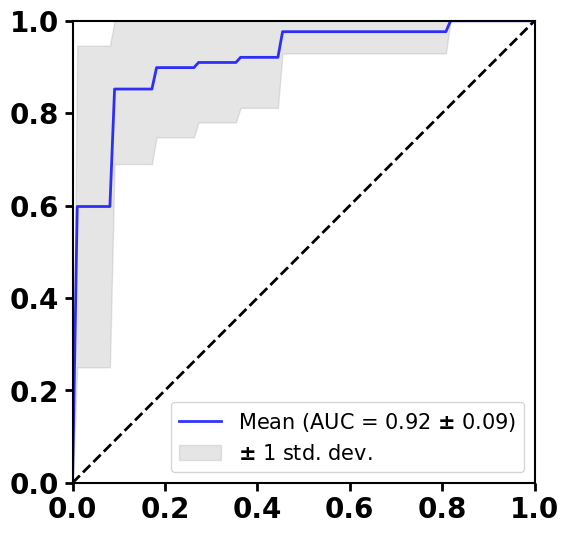

In [197]:
# for SVM IDH
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(random_state=42)

tprs = []
aucs = []
Accuracy=[]
precision=[]
Recall=[]
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_pred=classifier.predict(X[test])
    
    

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "svm_fd_IDH.tiff", dpi=600)

plt.show()

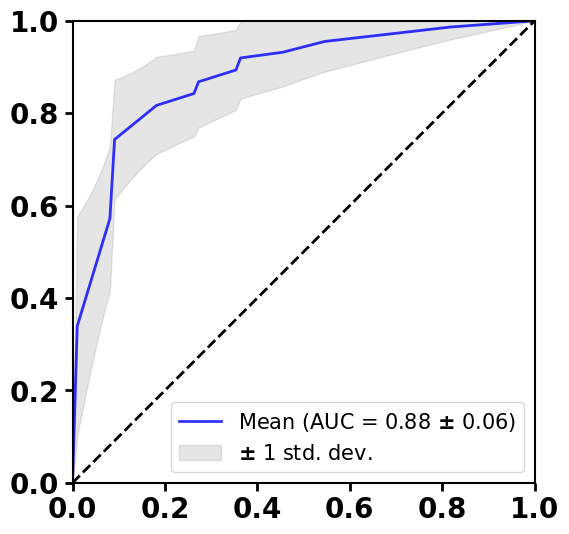

In [198]:
# for Random Forest IDH

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
#     xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)


plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "RF_fd_IDH.tiff", dpi=600)

plt.show()

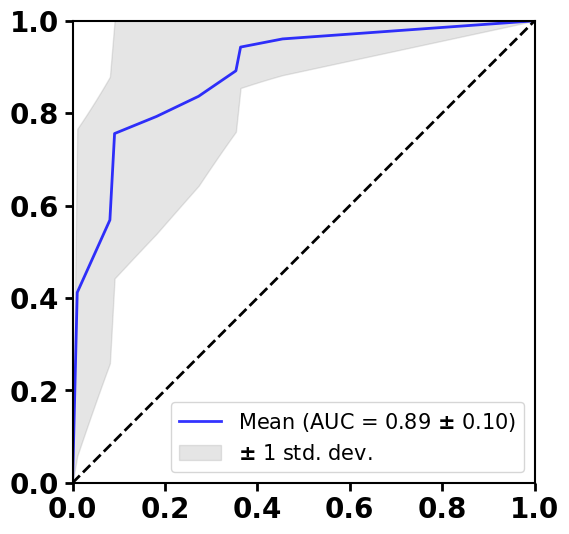

In [199]:
# for KNN IDH

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = KNeighborsClassifier(10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "KNN_fd_IDH.tiff", dpi=600)

plt.show()

## ROC for IDH classification using SVM, RF, KNN --LAC

In [200]:
df3 = df1.dropna(subset=['ncr_net_meanlac', 'et_meanlac'])

X = df3[['ncr_net_meanlac', 'et_meanlac']]
X = np.array(X).reshape((-1,2))


Y = df3[['IDH_status']]

y = Y == 'WT'
y =  y =  np.array(y)
print(len(df3))

122


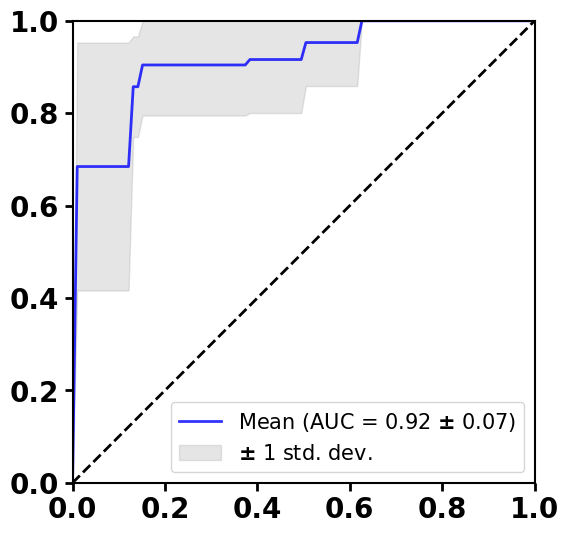

In [201]:
# for SVM IDH
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "svm_lac_IDH.tiff", dpi=600)

plt.show()

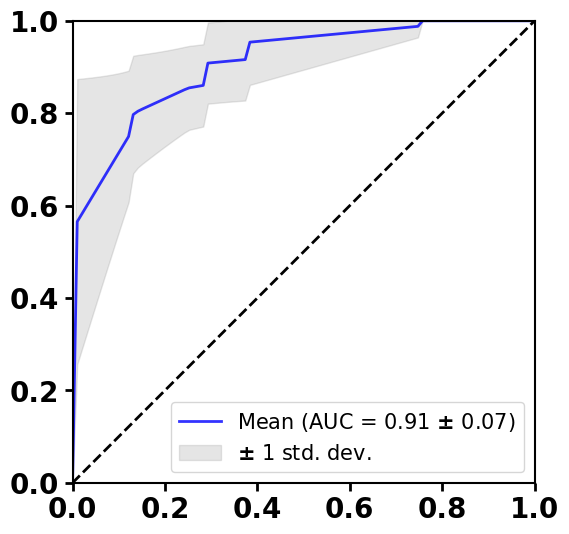

In [202]:
# for Random Forest IDH
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "RF_lac_IDH.tiff", dpi=600)

plt.show()

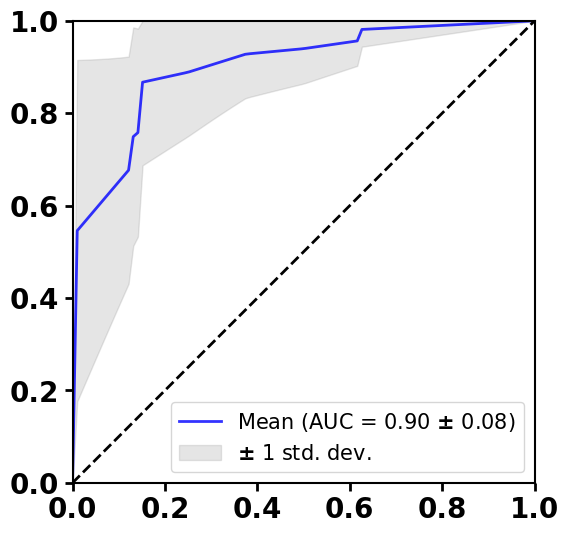

In [203]:
# for KNN IDH
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = KNeighborsClassifier(10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "KNN_lac_IDH.tiff", dpi=600)

plt.show()

## ROC for MGMT classification using SVM, RF, KNN --FD

In [204]:
df2['MGMT_promoter_status'].value_counts(dropna=False)

MGMT_promoter_status
Meth      74
Unmeth    45
Name: count, dtype: int64

In [205]:
X = df2[['ncr_net_meanfd', 'et_meanfd']]
X = np.array(X)

Y = df2[['MGMT_promoter_status']]

y = Y == 'Meth'
y =  y =  np.array(y)
df2.shape

(119, 26)

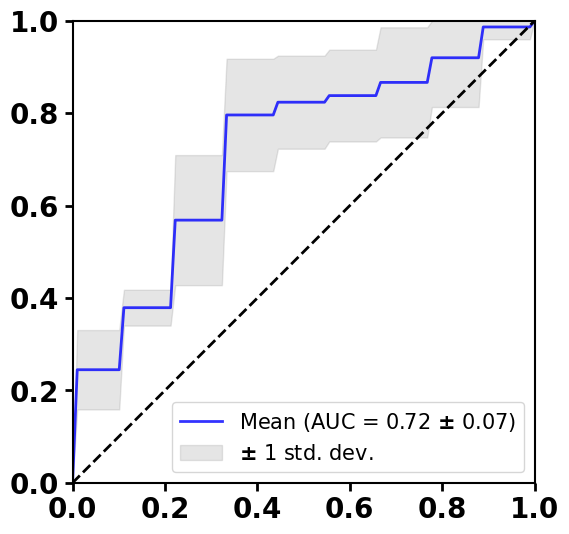

In [206]:
# for SVM MGMT

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(random_state=42)



tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "svm_fd_MGMT.tiff", dpi=600)

plt.show()

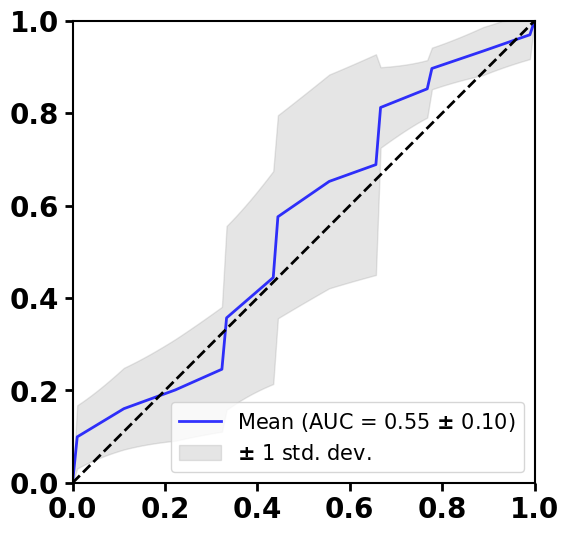

In [207]:
#RF MGMT

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "RF_fd_MGMT.tiff", dpi=600)

plt.show()

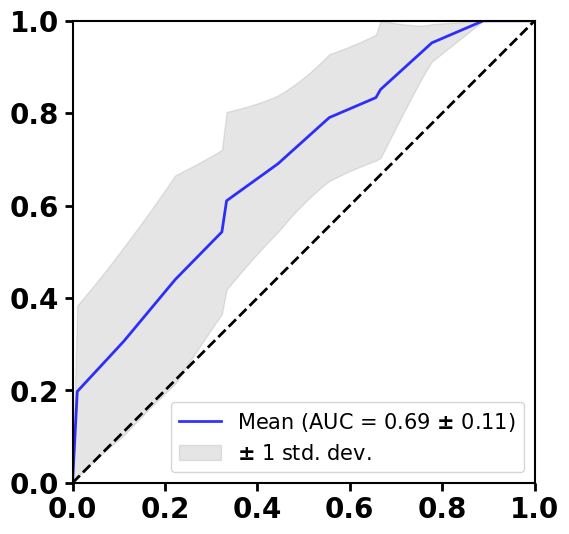

In [208]:
# for KNN MGMT

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = KNeighborsClassifier(10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "KNN_fd_MGMT.tiff", dpi=600)

plt.show()

## ROC for MGMT classification using SVM, RF, KNN --LAC

In [209]:
df5 = df2.dropna(subset= ['ncr_net_meanlac', 'et_meanlac'])
X = df5[['ncr_net_meanlac', 'et_meanlac']]
X = np.array(X).reshape((-1,2))


Y = df5[['MGMT_promoter_status']]

y = Y == 'Meth'
y =  y =  np.array(y)
print(len(df5))

99


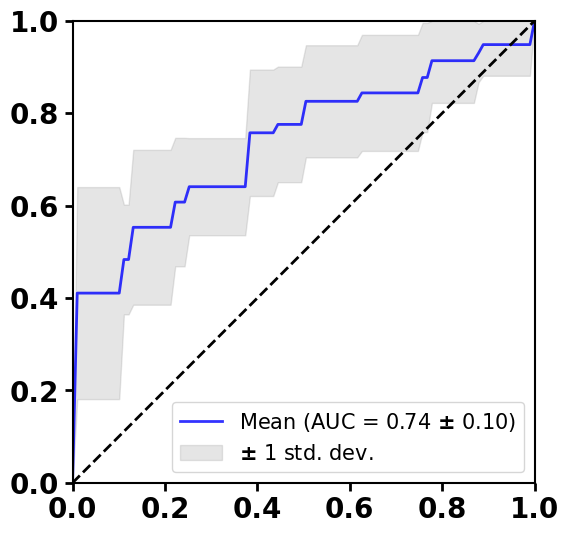

In [210]:
# for SVM MGMT

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold
 
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(random_state=42)



tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "svm_lac_MGMT.tiff", dpi=600)

plt.show()

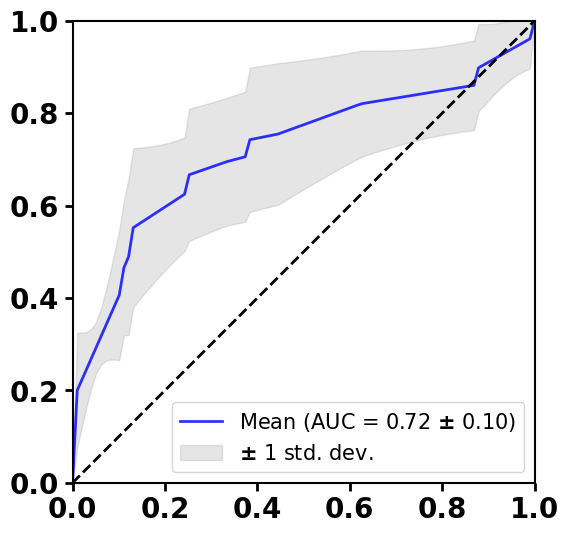

In [211]:
#RF MGMT

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "RF_lac_MGMT.tiff", dpi=600)

plt.show()

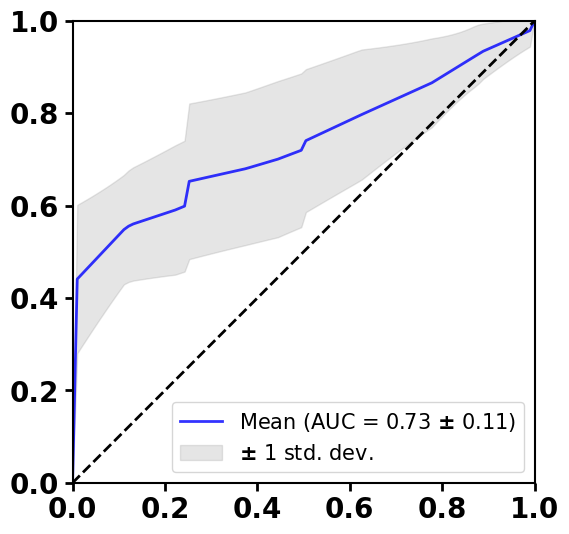

In [212]:
# for KNN MGMT

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = KNeighborsClassifier(10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "KNN_lac_MGMT.tiff", dpi=600)

plt.show()

## ROC for IDH/MGMT classification using SVM --FD and LAC

In [85]:
print(df['MGMT_promoter_status'].value_counts())
print(df['IDH_status'].value_counts())

MGMT_promoter_status
Meth      76
Unmeth    48
Name: count, dtype: int64
IDH_status
WT     87
Mut    55
Name: count, dtype: int64


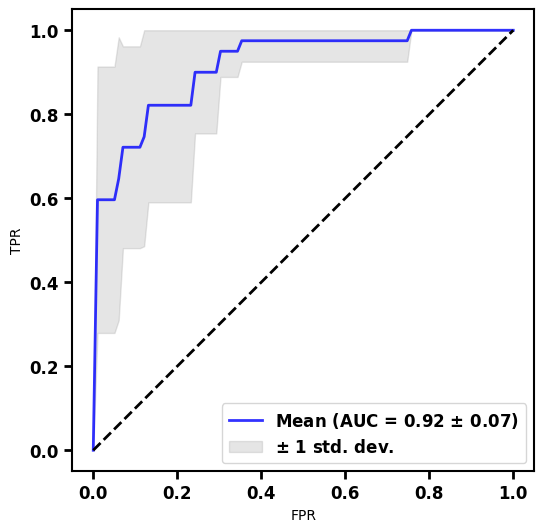

In [86]:
# Preprocessing for IDH
df6 = df.dropna(subset=['IDH_status','ncr_net_meanlac', 'et_meanlac'])
X = df6[['ncr_net_meanlac', 'et_meanlac', 'ncr_net_meanfd', 'et_meanfd']]
Y = df6['IDH_status']
y = (Y == 'Mut').astype(int) 

# Cross-validation
cv = StratifiedKFold(n_splits=5)
classifier = svm.SVC(random_state=42)

# Initialize variables to store ROC curve data
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))

for fold, (train, test) in enumerate(cv.split(X, y)):
    # Fit the classifier on the training data
    classifier.fit(X.iloc[train], y.iloc[train])
    
    # Create ROC curve display
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X.iloc[test],
        y.iloc[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    
    # Calculate ROC curve and AUC
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# Calculate the mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot the mean ROC curve
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# Plot the confidence interval
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

# Customize the plot
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="FPR",
    ylabel="TPR",
    title="",
)
ax.axis("square")
ax.legend(loc="lower right", fontsize=12)

# Set tick parameters and legend font size
ax.xaxis.set_tick_params(width=2, length=6, labelsize=12)
ax.yaxis.set_tick_params(width=2, length=6, labelsize=12)

plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="black", label="Chance level")
plt.show()

In [ ]:
# Preprocessing for MGMT
df4 = df.dropna(subset=[
                        # 'IDH_status',
                        'MGMT_promoter_status',
    'ncr_net_meanlac', 'et_meanlac'])
X = df4[['ncr_net_meanlac', 'et_meanlac', 'ncr_net_meanfd', 'et_meanfd']]
Y = df4['MGMT_promoter_status']
y = (Y == 'Meth').astype(int) 

# Cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(random_state=42)

# Initialize variables to store ROC curve data
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))

for fold, (train, test) in enumerate(cv.split(X, y)):
    # Fit the classifier on the training data
    classifier.fit(X.iloc[train], y.iloc[train])
    
    # Create ROC curve display
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X.iloc[test],
        y.iloc[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    
    # Calculate ROC curve and AUC
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# Calculate the mean ROC curve and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot the mean ROC curve
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# Plot the confidence interval
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

# Customize the plot
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="FPR",
    ylabel="TPR",
    title="",
)
ax.axis("square")
ax.legend(loc="lower right", fontsize=12)

# Set tick parameters and legend font size
ax.xaxis.set_tick_params(width=2, length=6, labelsize=12)
ax.yaxis.set_tick_params(width=2, length=6, labelsize=12)

plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="black", label="Chance level")
plt.show()

In [ ]:
df1 = df
df1['mixed'] = df['IDH_status'] + df['MGMT_promoter_status']
df1['mixed'].value_counts(dropna=False)

In [ ]:
print((df2['ncr_net_meanlac'].count(),df2['ncr_net_meanfd'].count(),df2['et_meanfd'].count(),df2['et_meanlac'].count()))

In [ ]:
df2 = df1.dropna(subset = ['mixed','ncr_net_meanfd', 'et_meanfd', 'ncr_net_meanlac', 'et_meanlac'])

X = df2[['ncr_net_meanfd','et_meanfd']]
X = np.array(X).reshape((-1,2))

Y = df2[['mixed']]

y = Y 
y = y = np.array(y)
print(len(X), len(y))

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from numpy import mean, std

# Define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)

# Report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print(len(y))

In [ ]:
print(df4['MGMT_promoter_status'].value_counts())

In [ ]:
type(Y)

## ROC for IDH classification using SVM, RF, KNN -- FD of whole tumour 

In [60]:
df2 = df.dropna(subset='IDH_status')

X = df2['wh_tumour_z_meanfd']
X = np.array(X).reshape((-1,1))

Y = df2[['IDH_status']]

y = Y == 'WT'
y = y = np.array(y)
df2.shape

(142, 26)

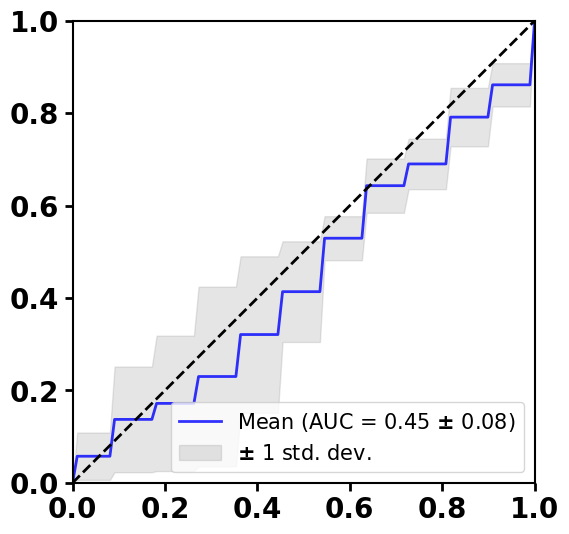

In [61]:
# for SVM IDH
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(random_state=42)

tprs = []
aucs = []
Accuracy=[]
precision=[]
Recall=[]
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_pred=classifier.predict(X[test])
    

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "svm_fd_wholetm_IDH.tiff", dpi=600)

plt.show()

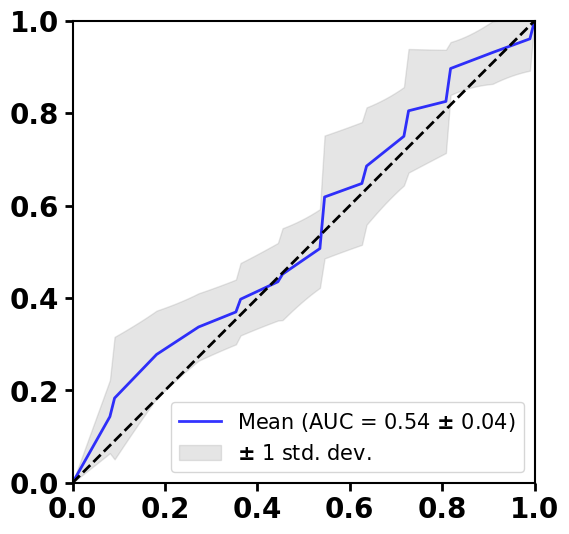

In [62]:
# for Random Forest IDH

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
#     xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)


plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "RF_fd_wholetm_IDH.tiff", dpi=600)

plt.show()

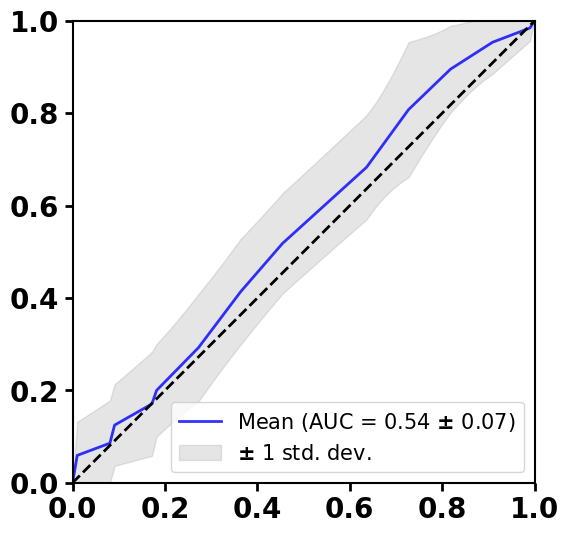

In [63]:
# for KNN IDH

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = KNeighborsClassifier(10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "KNN_fd_wholetm_IDH.tiff", dpi=600)

plt.show()

## ROC for MGMT classification using SVM, RF, KNN -- FD of whole tumour 

In [64]:
df2 = df.dropna(subset='MGMT_promoter_status')

X = df2['wh_tumour_z_meanfd']
X = np.array(X).reshape((-1,1))

Y = df2[['MGMT_promoter_status']]

y = Y == 'Meth'
y = y = np.array(y)
df2.shape

(124, 26)

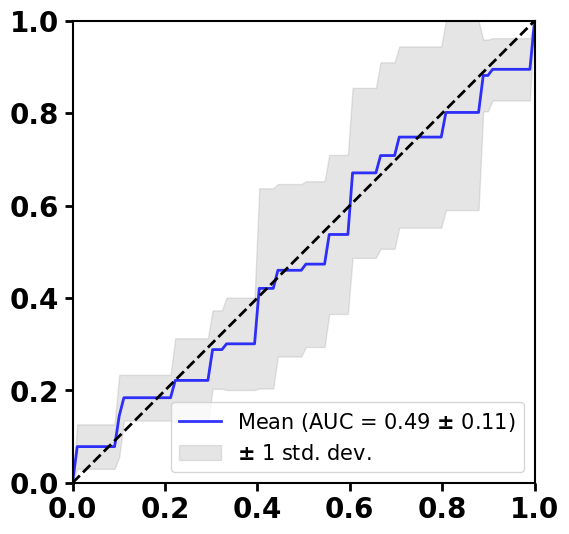

In [65]:
# for SVM IDH
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(random_state=42)

tprs = []
aucs = []
Accuracy=[]
precision=[]
Recall=[]
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    y_pred=classifier.predict(X[test])
    

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "svm_fd_wholetm_MGMT.tiff", dpi=600)

plt.show()

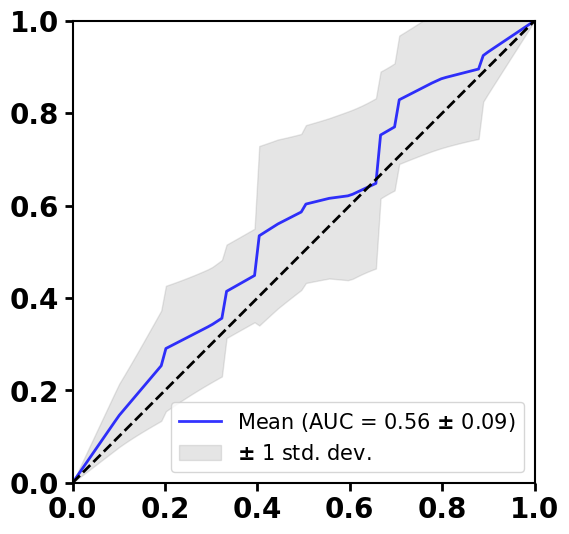

In [66]:
# for Random Forest IDH

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = RandomForestClassifier(n_estimators=10, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
#     xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)


plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "RF_fd_wholetm_MGMT.tiff", dpi=600)

plt.show()

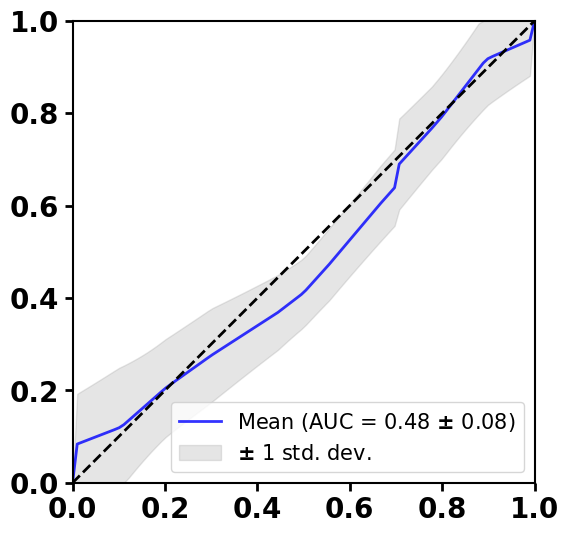

In [67]:
# for KNN IDH

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)
classifier = KNeighborsClassifier(10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")
plt.savefig(roc_path + "KNN_fd_wholetm_MGMT.tiff", dpi=600)

plt.show()

## Prediction Accuracy - IDH/MGMT classification using all variables

In [ ]:
# classifier = [
#     svm.SVC(random_state=42),
#     RandomForestClassifier(n_estimators=10, random_state=42),
#     KNeighborsClassifier(10)   
# ]

# list = ['et_meanfd', 'et_meanlac', 'ncr_net_meanfd', 'ncr_net_mean_lac', 'ed_meanfd', 'ed_meanlac']

In [ ]:
new_roc_path = '/home/ankit/Desktop/Glioma Paper/Fractal_dimension_tumour_paper_main/ROC_Curves_prediction_validation/'

### FD whole Tumour

In [ ]:
classifier = KNeighborsClassifier(10)
name_str = 'knn'
var_mol = '_lac_idh'

In [ ]:
df_pa = df.dropna(subset=['IDH_status', 'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac'])

Y = df_pa[['IDH_status']]

y = Y == 'WT'
y =  y =  np.array(y)

### Fractal Dimension

In [ ]:
classifier = KNeighborsClassifier(10)
name_str = 'knn'
var_mol = '_lac_idh'

In [ ]:
df_pa = df.dropna(subset=['IDH_status', 'et_meanlac', 'ncr_net_meanlac', 'ed_meanlac'])

Y = df_pa[['IDH_status']]

y = Y == 'WT'
y =  y =  np.array(y)

In [ ]:
#Enhancing - FD - IDH prediction
X = df_pa[['ncr_net_meanlac', 'et_meanlac']]
X = np.array(X)

df3.shape
print(len(X), len(y))

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)



mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

#plt.savefig(new_roc_path + "ncr_x_et_"+ name_str + var_mol + ".tiff", dpi=600)

results = []
name = r"ncr_x_et_%s%s: " % (name_str, var_mol)
result_label = r"Mean (AUC = %0.2f +/- %0.2f)" % (mean_auc, std_auc)
results.append([name, result_label])
result_file = 'result.txt'
with open(result_file, 'a') as file:
    for result in results:
        file.write(", ".join(result) + "\n")
        
plt.show()

In [ ]:
#Non-Enhancing - FD - IDH prediction
X = df_pa[['ncr_net_meanlac', 'ed_meanlac']]
X = np.array(X)

print(len(X), len(y))

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

#plt.savefig(new_roc_path + "net_x_ed_"+ name_str + var_mol + ".tiff", dpi=600)

results = []
name = r"net_x_ed_%s%s: " % (name_str, var_mol)
result_label = r"Mean (AUC = %0.2f +/- %0.2f)" % (mean_auc, std_auc)
results.append([name, result_label])
result_file = 'result.txt'
with open(result_file, 'a') as file:
    for result in results:
        file.write(", ".join(result) + "\n")

plt.show()

In [ ]:
#Edema - FD - IDH prediction
X = df_pa[['et_meanlac','ed_meanlac']]
X = np.array(X)

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)
# rc('font',weight="bold")
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

#plt.savefig(new_roc_path + "et_x_ed_"+ name_str + var_mol + ".tiff", dpi=600)

results = []
name = r"et_x_ed_%s%s: " % (name_str, var_mol)
result_label = r"Mean (AUC = %0.2f +/- %0.2f)" % (mean_auc, std_auc)
results.append([name, result_label])
result_file = 'result.txt'
with open(result_file, 'a') as file:
    for result in results:
        file.write(", ".join(result) + "\n")

plt.show()

### FD and Lac

In [ ]:
classifier = KNeighborsClassifier(10)
name_str = 'knn'
var_mol = '_fdlac_idh'

In [ ]:
df_pa = df.dropna(subset=['IDH_status'])
column = 'IDH_status'
mod = 'WT'

In [ ]:
df_pa2 = df.dropna(subset=['et_meanlac', 'ncr_net_meanlac'])
Y = df_pa2[[column]]
y = Y == mod
y =  y =  np.array(y)

#Enhancing - FD - IDH prediction
X = df_pa2[['ncr_net_meanfd', 'ncr_net_meanlac','et_meanfd', 'et_meanlac']]
X = np.array(X)

df3.shape
print(len(X), len(y))

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)



mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

#plt.savefig(new_roc_path + "net_x_et_"+ name_str + var_mol + ".tiff", dpi=600)

results = []
name = r"net_x_et_%s%s: " % (name_str, var_mol)
result_label = r"Mean (AUC = %0.2f +/- %0.2f)" % (mean_auc, std_auc)
results.append([name, result_label])
result_file = 'result.txt'
with open(result_file, 'a') as file:
    for result in results:
        file.write(", ".join(result) + "\n")
        
plt.show()

In [ ]:
df_pa2 = df.dropna(subset=['ncr_net_meanlac', 'ed_meanlac'])
Y = df_pa2[[column]]
y = Y == mod
y =  y =  np.array(y)

#Enhancing - FD - IDH prediction
X = df_pa2[['ncr_net_meanfd', 'ncr_net_meanlac', 'ed_meanfd', 'ed_meanlac']]
X = np.array(X)

df3.shape
print(len(X), len(y))

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)



mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

#plt.savefig(new_roc_path + "net_x_ed_"+ name_str + var_mol + ".tiff", dpi=600)

results = []
name = r"net_x_ed_%s%s: " % (name_str, var_mol)
result_label = r"Mean (AUC = %0.2f +/- %0.2f)" % (mean_auc, std_auc)
results.append([name, result_label])
result_file = 'result.txt'
with open(result_file, 'a') as file:
    for result in results:
        file.write(", ".join(result) + "\n")
        
plt.show()

In [ ]:
df_pa2 = df.dropna(subset=['ed_meanlac', 'et_meanlac'])
Y = df_pa2[[column]]
y = Y == mod
y =  y =  np.array(y)

#Enhancing - FD - IDH prediction
X = df_pa2[['et_meanfd', 'et_meanlac','ed_meanfd', 'ed_meanlac']]
X = np.array(X)

df3.shape
print(len(X), len(y))

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)



mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

#plt.savefig(new_roc_path + "et_x_ed_"+ name_str + var_mol + ".tiff", dpi=600)

results = []
name = r"et_x_ed_%s%s: " % (name_str, var_mol)
result_label = r"Mean (AUC = %0.2f +/- %0.2f)" % (mean_auc, std_auc)
results.append([name, result_label])
result_file = 'result.txt'
with open(result_file, 'a') as file:
    for result in results:
        file.write(", ".join(result) + "\n")
        
plt.show()

### All three subcomponent prediction

In [ ]:
classifier = KNeighborsClassifier(10)
name_str = 'knn'
var_mol = '_fdlac_mgmt'

In [ ]:
df_pa = df.dropna(subset=['MGMT_promoter_status'])
column = 'MGMT_promoter_status'
mod = 'Meth'

#### FD and Lac

In [ ]:
df_pa2 = df.dropna(subset=['ncr_net_meanfd', 'et_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'et_meanlac', 'ed_meanlac'])
Y = df_pa2[[column]]
y = Y == mod
y =  y =  np.array(y)

#Enhancing - FD - IDH prediction
X = df_pa2[['ncr_net_meanfd', 'et_meanfd', 'ed_meanfd', 'ncr_net_meanlac', 'et_meanlac', 'ed_meanlac']]
X = np.array(X)

df3.shape
print(len(X), len(y))

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)



mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

#plt.savefig(new_roc_path + "net_x_et_x_ed_"+ name_str + var_mol + ".tiff", dpi=600)

results = []
name = r"net_x_et_x_ed_%s%s: " % (name_str, var_mol)
result_label = r"Mean (AUC = %0.2f +/- %0.2f)" % (mean_auc, std_auc)
results.append([name, result_label])
result_file = 'result.txt'
with open(result_file, 'a') as file:
    for result in results:
        file.write(", ".join(result) + "\n")
        
plt.show()

#### FD/LAC

In [ ]:
df_pa2 = df.dropna(subset=['ncr_net_meanlac', 'et_meanlac', 'ed_meanlac'])
Y = df_pa2[[column]]
y = Y == mod
y =  y =  np.array(y)

#Enhancing - FD - IDH prediction
X = df_pa2[['ncr_net_meanlac', 'et_meanlac', 'ed_meanlac']]
X = np.array(X)

df3.shape
print(len(X), len(y))

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        lw=0,
        ax=ax,
    )
    viz.line_.set_label("")
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)



mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="",
    ylabel="",
    title=f"",
)
ax.axis("square")
ax.legend(loc="lower right")
rc("axes", linewidth=1.5)

plt.ylim(0,1)
plt.xlim(0,1)

ax.xaxis.set_tick_params(width=2, length=6, labelsize = 20)
ax.yaxis.set_tick_params(width=2, length=6, labelsize = 20)

legend_font = {'size': 15, 'weight': 'normal'}  
ax.legend(loc="lower right", prop=legend_font)

plt.plot([0,1],[0,1], linestyle="--", lw=2, color="black",label= r"Chance level")

#plt.savefig(new_roc_path + "net_x_et_x_ed_"+ name_str + var_mol + ".tiff", dpi=600)

results = []
name = r"net_x_et_x_ed_%s%s: " % (name_str, var_mol)
result_label = r"Mean (AUC = %0.2f +/- %0.2f)" % (mean_auc, std_auc)
results.append([name, result_label])
result_file = 'result.txt'
with open(result_file, 'a') as file:
    for result in results:
        file.write(", ".join(result) + "\n")
        
plt.show()